In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [75]:
# read the CSV file
healthdata = pd.read_csv('C:\Simplilearn\HealthCare Data Science Capstone\Project 2\Healthcare - Diabetes\health care diabetes.csv')

## Project Task: Week 1

### Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. ####


In [14]:
healthdata.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


NOTE : Here Outcome is the Target Variable which holds only 1 and 0

1 - Diabetic
0 - Non Diabetic

In [21]:
#Descriptive Analysis
healthdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [17]:
healthdata.size

6912

In [18]:
# here we have 768 observations(rows) and 9 variables(columns)
healthdata.shape

(768, 9)

In [19]:
healthdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
healthdata.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [24]:
# check 0 (here 0 indicates missing value)
healthdata.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [76]:
# replace 0 with mean value only for the below columns :
# Glucose, BloodPressure, SkinThickness, Insulin, BMI
healthdata['Glucose'] = healthdata['Glucose'].replace(0, df['Glucose'].mean())
healthdata['BloodPressure'] = healthdata['BloodPressure'].replace(0, df['BloodPressure'].mean())
healthdata['SkinThickness'] = healthdata['SkinThickness'].replace(0, df['SkinThickness'].mean())
healthdata['Insulin'] = healthdata['Insulin'].replace(0, df['Insulin'].mean())
healthdata['BMI'] = healthdata['BMI'].replace(0, df['BMI'].mean())

healthdata.eq(0).any()
healthdata.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A0EDDBE08>,
      dtype=object)

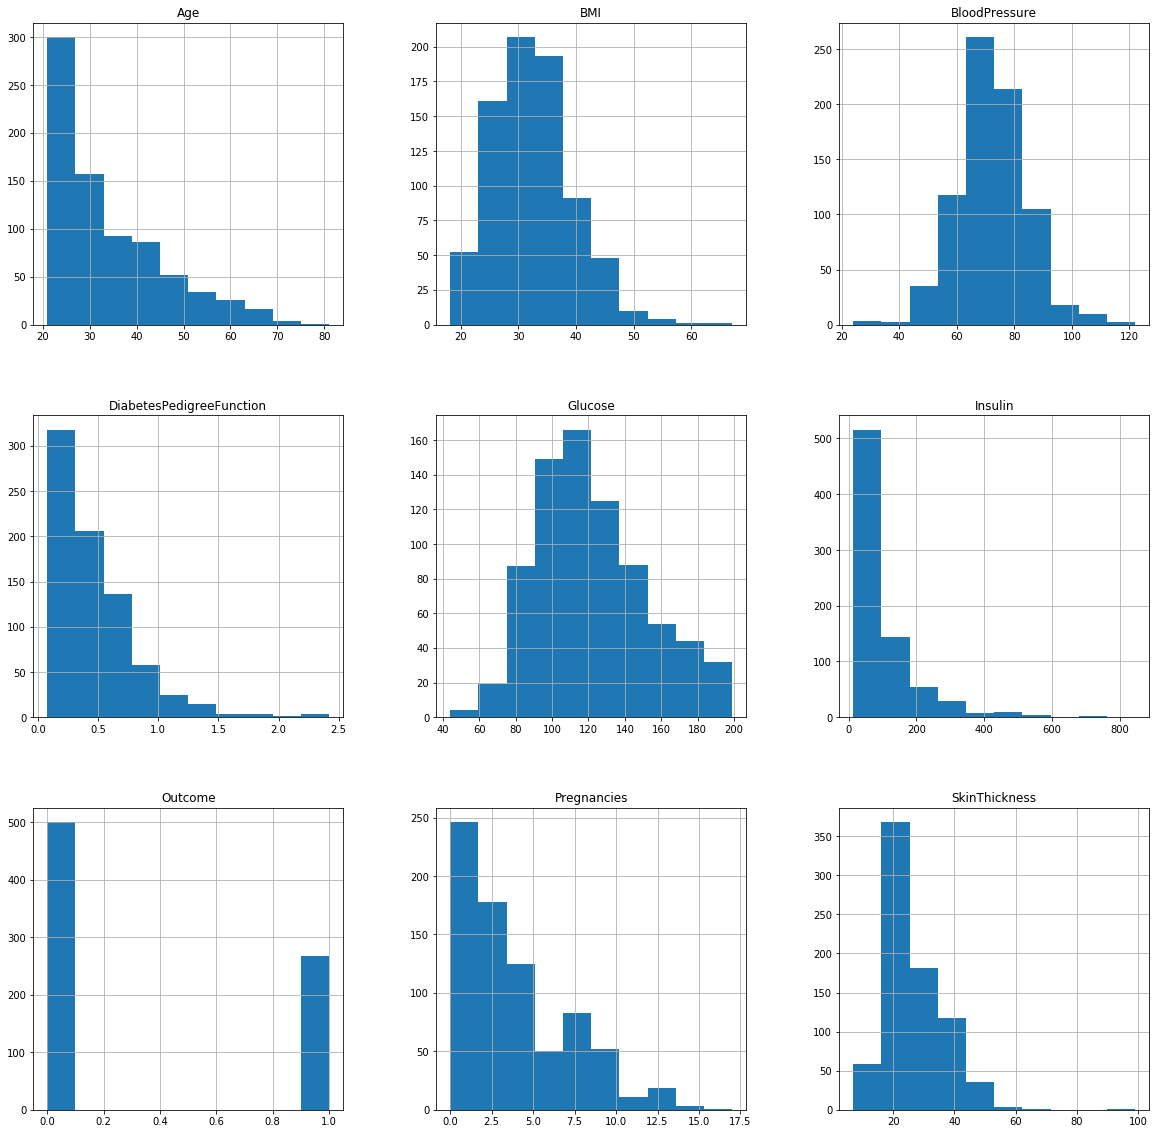

In [44]:
healthdata.hist(figsize = (20,20))

In [77]:
# get the skewness of the data
healthdata.skew()

Pregnancies                 0.901674
Glucose                     0.533225
BloodPressure               0.173050
SkinThickness               1.226670
Insulin                     3.291825
BMI                         0.601103
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

#### Acceptable Skewness Range :

The standard which is followed is skewness between -1 and +1

As a general rule of thumb:

If skewness is less than -1 or greater than 1, the distribution is highly skewed.

If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.

If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

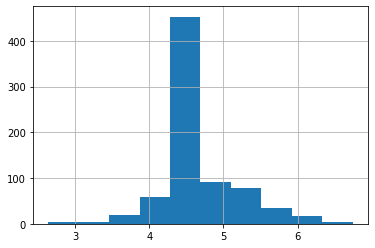

In [78]:
# the above skewness output shows 
# Insulin is highly skewed
# BMI and Skin Thickness is moderately skewed
# Glucose and Blood Pressure is approximately symmetric

# So A log transformation can help to fit a very skewed distribution into normal distribution
# Log Transformation of Insulin
healthdata['Insulin'] = healthdata['Insulin'].apply(np.log)
healthdata['Insulin'].hist()


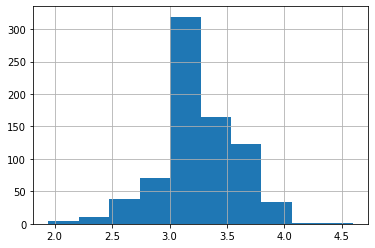

In [79]:
# Log Transformation of SkinThickness
healthdata['SkinThickness'] = healthdata['SkinThickness'].apply(np.log)
#df['SkinThickness'].apply(np.log).hist()
healthdata['SkinThickness'].hist()

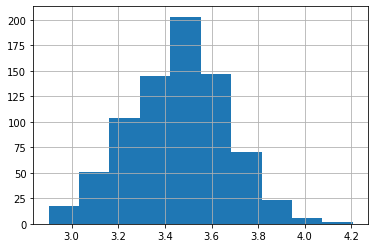

In [80]:
# Log Transformation of BMI
healthdata['BMI'] = healthdata['BMI'].apply(np.log)
healthdata['BMI'].hist()

In [81]:
healthdata.skew()

Pregnancies                 0.901674
Glucose                     0.533225
BloodPressure               0.173050
SkinThickness              -0.039976
Insulin                     0.847421
BMI                        -0.054161
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

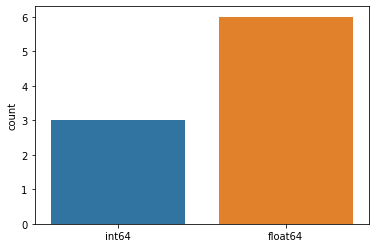

In [82]:
# Create a count (frequency) plot describing the data types
# and the count of variables. 
healthdata.dtypes
sns.countplot(healthdata.dtypes.map(str))
#value_counts()
#df.dtypes.values

In [83]:
healthdata.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Week 2--Data Exploration:
1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.
2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.
3. Perform correlation analysis. Visually explore it using a heat map.

## Checking balance of the dataset

Count of class is:
 0    500
1    268
Name: Outcome, dtype: int64


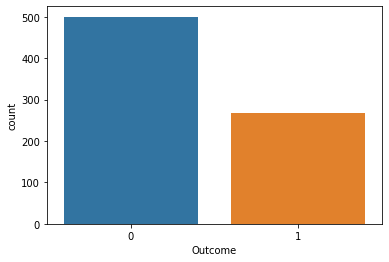

In [89]:
#Creating Bar Graph of the target variable Outcome
sns.countplot(healthdata['Outcome'])
print("Count of class is:\n",df['Outcome'].value_counts())

We can see that both class is balanced so we need not to perform any sampling method to maintain the balance between both classes. Therefor i will be directly using this data in training and testing purpose without performing any sampling method. Meanwhile during Model Validation , we also need not worry abour ROC Curve because data is not imbalanced, but as this is a medical data so i will be using ROC curve to make sure TYPE 2 ERROR will not be there.

1)A bar represents a plot of outcome and corresponding number of patients.

2)Data set consists of two types of outcomes, 0 and 1 representing non-diabetic and diabetic patient respectively.

3)From the plot, 268 patients are daibetic and remaining 500 are non-diabetic.

A pairs plot allows us to see both distribution of single variable and relationships between two variables.

## Creating Scatter charts between variables

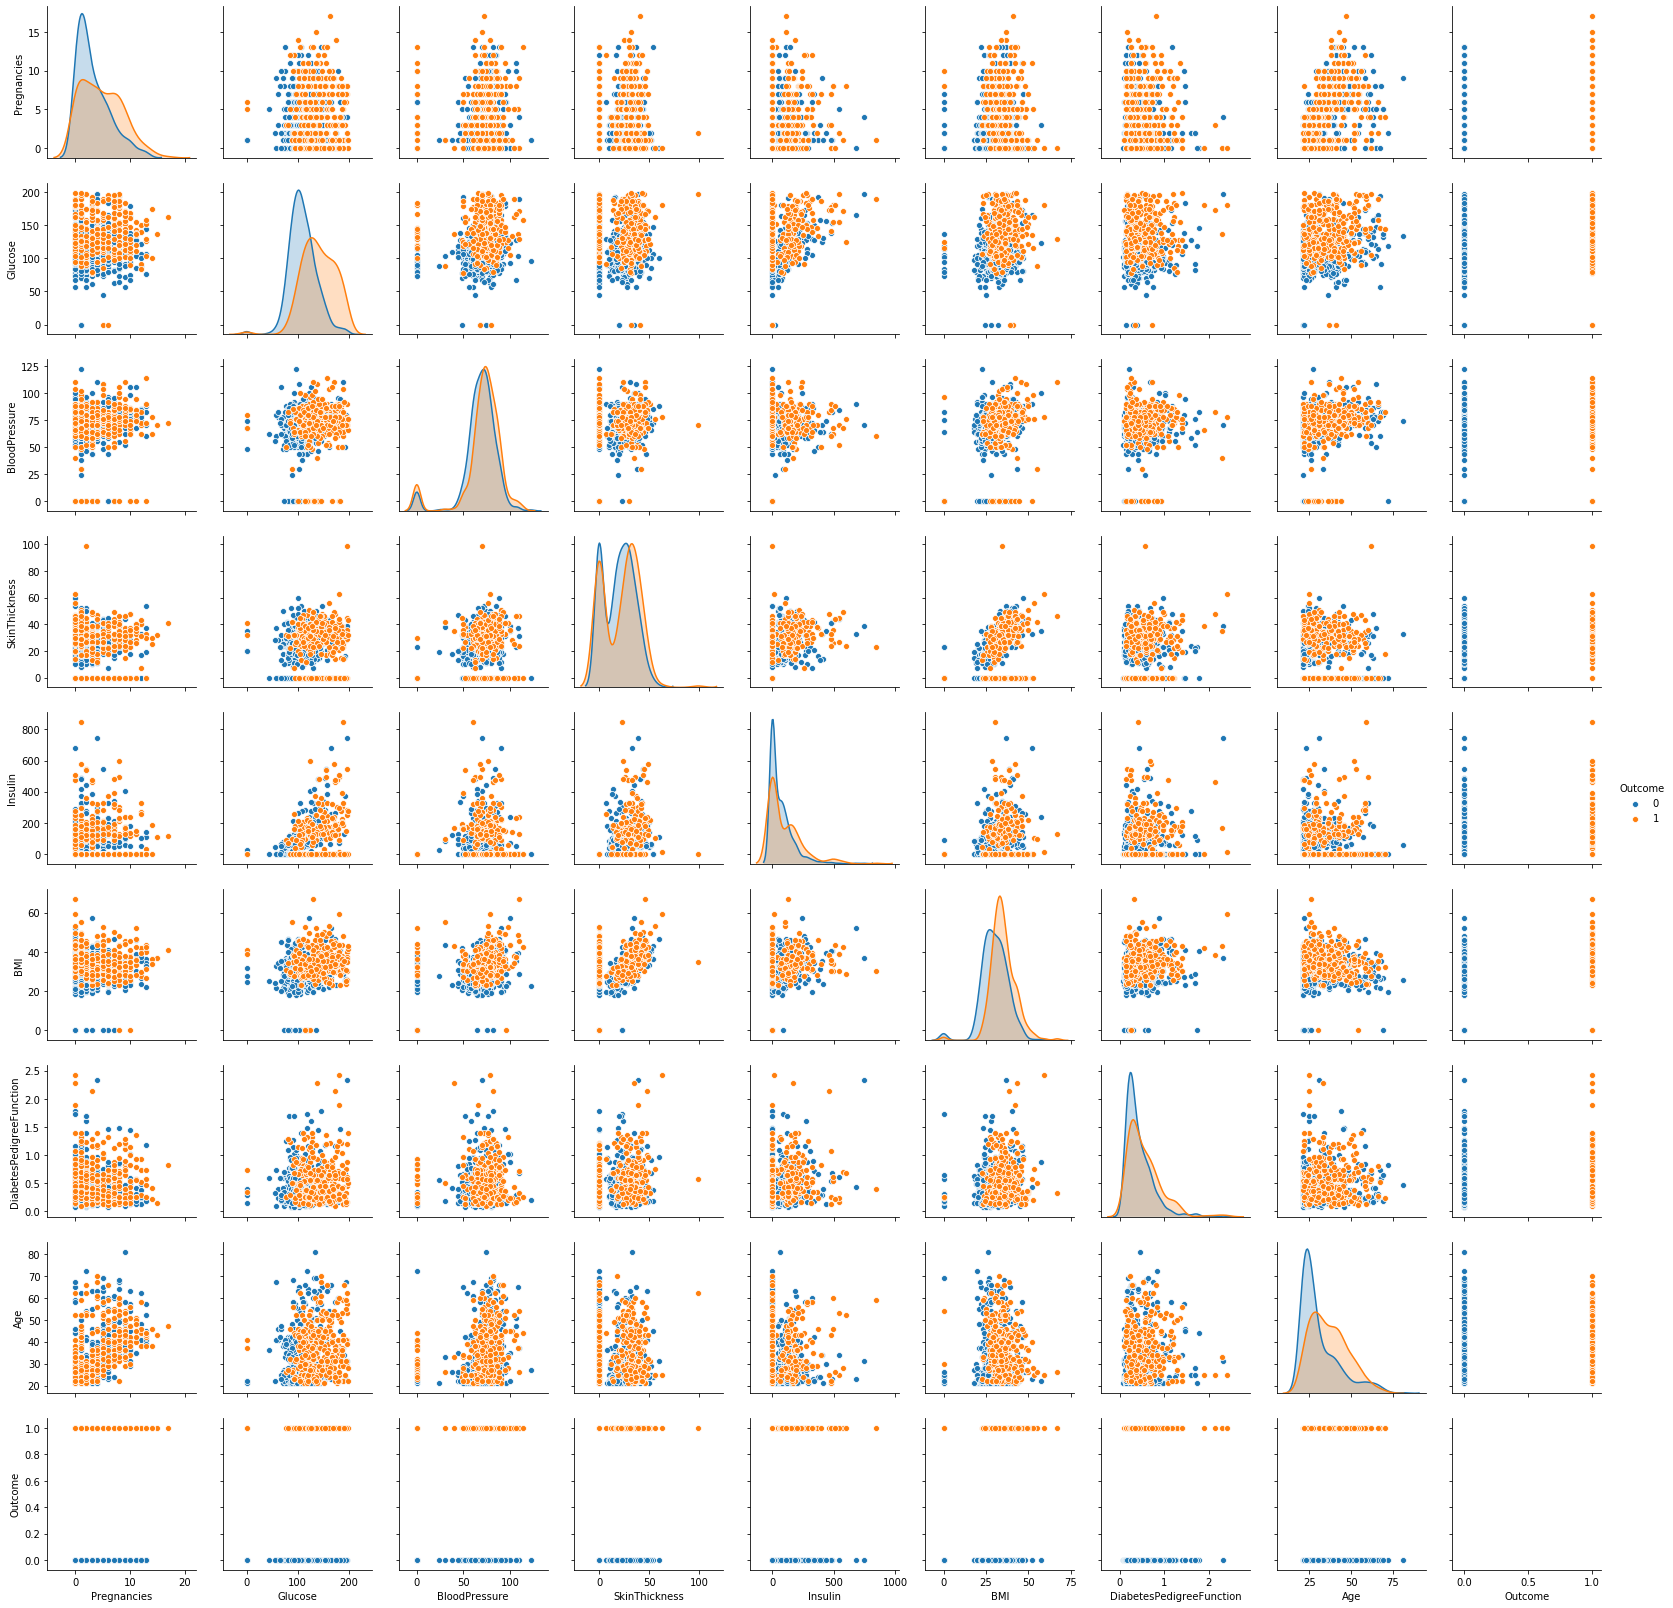

In [90]:
sns.pairplot(df, hue = 'Outcome')

NOTE : the above output shows

Orange dots are Diabetic & Blue dots are Non-Diabetic
Glucose is modelate positive correlated with Outcome
BloodPressure and Age are moderate positive correlated

## Correlation Analysis



In [91]:
# Creating correlation table for analysis
healthdata.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.041923,0.012882,0.042696,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.161080,0.420000,0.237905,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.141724,0.029934,0.271812,0.000371,0.326740,0.162986
SkinThickness,0.041923,0.161080,0.141724,1.000000,0.244609,0.553606,0.126937,0.038566,0.183625
Insulin,0.012882,0.420000,0.029934,0.244609,1.000000,0.220525,0.142408,0.062000,0.211521
BMI,0.042696,0.237905,0.271812,0.553606,0.220525,1.000000,0.149000,0.039090,0.320871
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.126937,0.142408,0.149000,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.038566,0.062000,0.039090,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.183625,0.211521,0.320871,0.173844,0.238356,1.000000


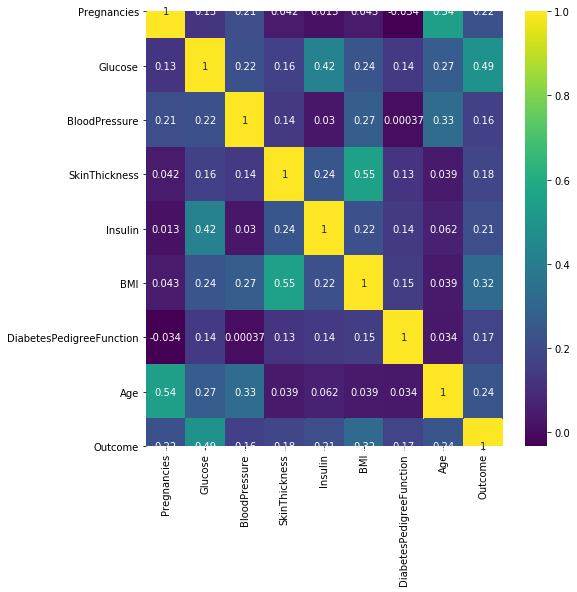

In [93]:
# Create Coorelation Heatmap with correlation value
plt.subplots(figsize=(8,8))
sns.heatmap(healthdata.corr(),annot=True,cmap='viridis')

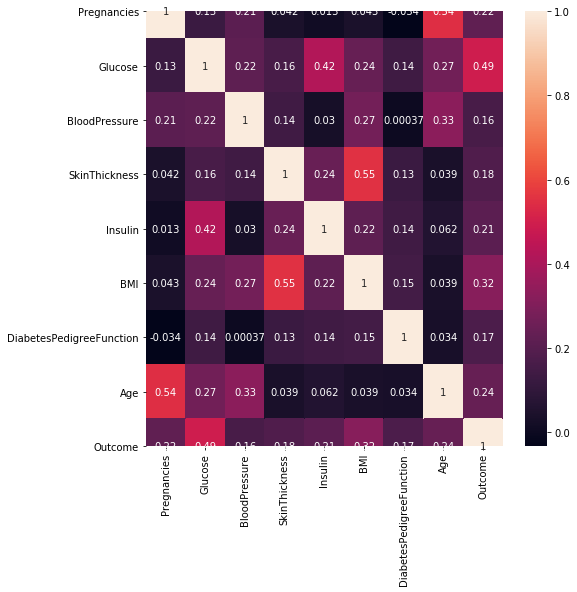

In [95]:
plt.subplots(figsize=(8,8))
sns.heatmap(healthdata.corr(),annot=True)

1)Correlation is used to test relationship between two variables.

2)Correlation coefficient ranges (-1 to +1). 1 is indicate the positive corrlation ,0 is indicate the no correlation and -1 is indicate the negative correlation between them.consider example for better understanding the relationship between AGE vs AGE is i.e.positive correlation & AGE vs Insulin is -0.042 i.e. negative correlation.

By the correlation analysis, it can be determined that :
1. Age & Pregnancy have a high correlation ~ 0.54
2. BMI & SkinThickness have a high correlation ~ 0.54

## Project Task: Week 3

#### Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

### Feature Selection
Used backward elimintation method for Feature Selection. Used all the features to create the model once, and then started excluding the features having least correlation but it only reduced the accuracy. Hence using all the features to achieve maximum possible accuracy
### Feature Engineering
Some feature Engineering was performed during EDA, where 0 indicated missing values and we did missing value imputations.

In [96]:
#get the feature & target column from the dataset
x=healthdata.iloc[:,:-1].values
y=healthdata.iloc[:,-1].values

In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

### Logistic Regression

In [99]:
# Here target variable is categorical.So will use Classification Algorithm
# Logistic Rgression Used to estimate 
# discrete values (binary values like 0/1, yes/no, true/false ) based on given set
# of independent variable(s).

#Create Logistic Regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

[[94 18]
 [13 29]]


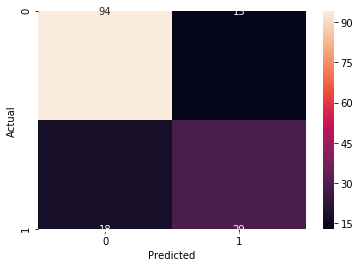

In [101]:
# Model Evaluation using Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

cm = confusion_matrix(y_pred,y_test)
print(cm)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [102]:
# Logistic Regression Model Accuracy Score
print('Logistic Regression Model Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Logistic Regression Model Accuracy:  0.7987012987012987


In [104]:
print("\n","Classification Report::")
print(metrics.classification_report(y_test,y_pred),'\n')


 Classification Report::
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       107
           1       0.69      0.62      0.65        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154
 



### Decision Tree Classifier

In [105]:
#Applying Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier(max_depth=5)
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)

In [106]:
# Decision Tree Model Score
#model3.score(X_test,y_test)
# Model Accuracy, how often is the classifier correct?
print("Decision Tree Model Accuracy:",metrics.accuracy_score(y_test, y_pred))

Decision Tree Model Accuracy: 0.7662337662337663


In [107]:
print("\n","Classification Report::")
print(metrics.classification_report(y_test,y_pred),'\n')


 Classification Report::
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       107
           1       0.59      0.74      0.66        47

    accuracy                           0.77       154
   macro avg       0.73      0.76      0.74       154
weighted avg       0.79      0.77      0.77       154
 



### Random Forest

In [108]:
# Applying Random Forest
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(n_estimators=11)
model4.fit(x_train,y_train)
y_pred=model4.predict(x_test)

In [109]:
# Random Forest Model Score
#model4.score(x_test,y_test)
print("Random Forest Model Accuracy:",metrics.accuracy_score(y_test, y_pred))

Random Forest Model Accuracy: 0.7922077922077922


In [110]:
print("\n","Classification Report::")
print(metrics.classification_report(y_test,y_pred),'\n')


 Classification Report::
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154
 



### Support Vector Machine

In [111]:
# Applying Support Vector Machine Classifier (SVM)

from sklearn.svm import SVC 

model5 = SVC(kernel='rbf',
           gamma='auto')
model5.fit(x_train,y_train)
y_pred=model5.predict(x_test)

In [112]:
# SVM Model Score
model5.score(x_test,y_test)
print("SVM Model Accuracy:",metrics.accuracy_score(y_test, y_pred))

SVM Model Accuracy: 0.6883116883116883


In [113]:
print("\n","Classification Report::")
print(metrics.classification_report(y_test,y_pred),'\n')


 Classification Report::
              precision    recall  f1-score   support

           0       0.70      0.97      0.81       107
           1       0.40      0.04      0.08        47

    accuracy                           0.69       154
   macro avg       0.55      0.51      0.44       154
weighted avg       0.61      0.69      0.59       154
 



### KNN

In [115]:
# Applying k-nearest neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)

In [116]:
# KNN Model Score
#model2.score(X_test,y_test)
print("KNN Model Accuracy:",metrics.accuracy_score(y_test, y_pred))

KNN Model Accuracy: 0.7402597402597403


In [117]:
print("\n","Classification Report::")
print(metrics.classification_report(y_test,y_pred),'\n')


 Classification Report::
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       107
           1       0.58      0.53      0.56        47

    accuracy                           0.74       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.73      0.74      0.74       154
 



NOTE : Comparison of different Model Accuracy Score :

Logistic Regression Model Accuracy: 0.7987012987012987

Decision Tree Model Accuracy: 0.7662337662337663

Random Forest Model Accuracy: 0.7922077922077922

SVM Model Accuracy: 0.6883116883116883

KNN Model Accuracy: 0.7402597402597403

The above output shows "Logistic Regression" and "Decision Tree" are giving better results than the other models.

### Ensemble Learning

Now we will try below Ensemble Learning :

1)Boosting based Ensemble using XGBoost

2)Voting based Ensemble for Classification. Voting is one of the most straightforward Ensemble learning techniques in which predictions from multiple models are combined. The method starts with creating two or more separate models with the same dataset. Then a Voting based Ensemble model can be used to wrap the previous models and aggregate the predictions of those models.

In [120]:
# Try Boosting Based Ensemble
# Let's try XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# fit model into training data
model20 = XGBClassifier()
model20.fit(x_train,y_train)
y_pred=model20.predict(x_test)

print("XGBoost Model Accuracy:",metrics.accuracy_score(y_test, y_pred))

XGBoost Model Accuracy: 0.8246753246753247


In [121]:
# Now trying Voting based Ensemble for Classification
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

seed = 7
num_trees = 70

kfold = model_selection.KFold(n_splits=5, random_state=seed)

# create the sub models
estimators = []

model11 = LogisticRegression()
estimators.append(('Logistic', model11))
model12 = DecisionTreeClassifier()
estimators.append(('DecisionTree', model12))
model13 = RandomForestClassifier()
estimators.append(('RandomForest', model13))
model14 = SVC()
estimators.append(('SVM', model14))
model15 = KNeighborsClassifier()
estimators.append(('KNN', model15))
#estimators
# create the ensemble model
ensemble = VotingClassifier(estimators)
#model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
#results = model_selection.cross_val_score(ensemble, x, y, cv=kfold)
ensemble.fit(x_train,y_train)
y_pred=ensemble.predict(x_test)
#model.score(x_test,y_test)
print("Ensemble Voting Based Model Accuracy:",metrics.accuracy_score(y_test, y_pred))

#print(results.mean())


Ensemble Voting Based Model Accuracy: 0.8051948051948052


NOTE : After applying Ensemble we got the below

XGBoost Model Accuracy: 0.8246753246753247
Ensemble Voting Based Model Accuracy: 0.8051948051948052

The above output shows Ensemble gives better model accuracy

### Project Task: Week 4

### Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

NOTE :

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

In a Receiver Operating Characteristic (ROC) curve the true positive rate (Sensitivity) is plotted in function of the false positive rate (100-Specificity) for different cut-off points. Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold.

In [123]:
# Classification Report of Logistic Regression
print(classification_report(y,model.predict(x)))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       500
           1       0.71      0.53      0.61       268

    accuracy                           0.76       768
   macro avg       0.75      0.71      0.72       768
weighted avg       0.76      0.76      0.75       768



AUC: 0.815


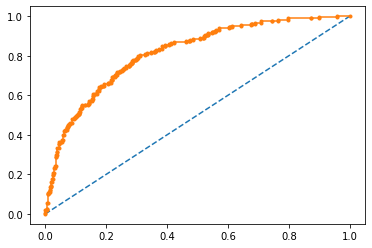

In [124]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)
# for Logistic Regression

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model.predict_proba(x)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [125]:
# Classification Report of KNN
print(classification_report(y,model2.predict(x)))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       500
           1       0.71      0.63      0.67       268

    accuracy                           0.78       768
   macro avg       0.76      0.75      0.75       768
weighted avg       0.78      0.78      0.78       768



AUC: 0.859
True Positive Rate - [0.         0.13432836 0.29477612 0.49253731 0.62686567 0.77985075
 0.89925373 0.99626866 1.        ], False Positive Rate - [0.    0.004 0.024 0.064 0.136 0.232 0.364 0.662 1.   ] Thresholds - [2.         1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]


Text(0, 0.5, 'True Positive Rate')

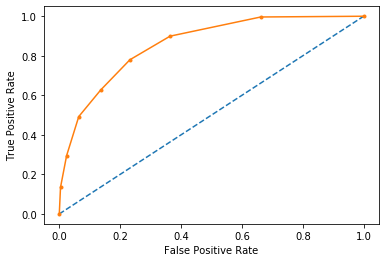

In [127]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)
# for KNN Model

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model2.predict_proba(x)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [128]:
# Classification Report of Decision Tree
print(classification_report(y,model3.predict(x)))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       500
           1       0.69      0.81      0.75       268

    accuracy                           0.81       768
   macro avg       0.79      0.81      0.80       768
weighted avg       0.82      0.81      0.81       768



AUC: 0.893
True Positive Rate - [0.         0.01865672 0.30597015 0.35074627 0.48134328 0.48880597
 0.54477612 0.73134328 0.81343284 0.86567164 0.88432836 0.8880597
 0.92537313 0.94776119 0.95522388 0.97761194 0.98880597 0.99253731
 1.        ], False Positive Rate - [0.    0.004 0.02  0.024 0.038 0.04  0.062 0.148 0.192 0.23  0.25  0.254
 0.31  0.348 0.394 0.528 0.598 0.628 1.   ] Thresholds - [2.         1.         0.92424242 0.90909091 0.83783784 0.66666667
 0.63636364 0.54166667 0.53846154 0.4        0.38461538 0.33333333
 0.25       0.2        0.11111111 0.08196721 0.07407407 0.07142857
 0.        ]


Text(0, 0.5, 'True Positive Rate')

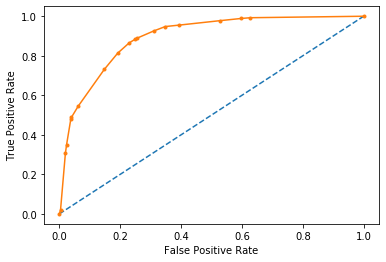

In [129]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)
# for Decision Tree

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model3.predict_proba(x)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [130]:
# Classification Report of Random Forest
print(classification_report(y,model4.predict(x)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       500
           1       0.94      0.91      0.93       268

    accuracy                           0.95       768
   macro avg       0.95      0.94      0.94       768
weighted avg       0.95      0.95      0.95       768



AUC: 0.983
True Positive Rate - [0.         0.14925373 0.42537313 0.61567164 0.80223881 0.87686567
 0.9141791  0.96268657 0.97014925 0.98507463 0.98507463 1.
 1.        ], False Positive Rate - [0.    0.    0.002 0.006 0.008 0.02  0.032 0.07  0.112 0.204 0.368 0.598
 1.   ] Thresholds - [2.         1.         0.90909091 0.81818182 0.72727273 0.63636364
 0.54545455 0.45454545 0.36363636 0.27272727 0.18181818 0.09090909
 0.        ]


Text(0, 0.5, 'True Positive Rate')

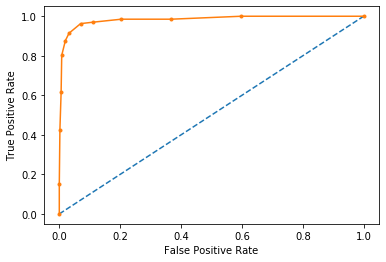

In [131]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)
# for Random Forest

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model4.predict_proba(x)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

## Comparison of different AUC score as below :

#### Logistic Regression AUC: 0.815

#### KNN AUC: 0.859

#### Decision Tree AUC: 0.893

#### Random Forest AUC: 0.983

The above output shows "Random Forest" is giving better result than the other models. 
Also f1-score of Random Forest is giving better result than the other models.

NOTE : In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the disease or condition based on the test), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding.

The F1 Score is the 2((precisionrecall)/(precision+recall)). It is also called the F Score or the F Measure. Put another way, the F1 score conveys the balance between the precision and the recall.

Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. ... In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model on.
The highest possible value of F1 is 1, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero

ROC Curve NOTE :

True Positive Rate (TPR) = TP / (TP + FN)

False Positive Rate (FPR) = FP / (FP + TN)

Precision Recall NOTE :

PPV : Positive Predictive Value

TPR : True Positive Rate

precision = PPV = TP/(TP + FP)

recall = TPR = TP/(TP + FN)

##### So we can see Random Forest Classifier is best among all.